In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv("Diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


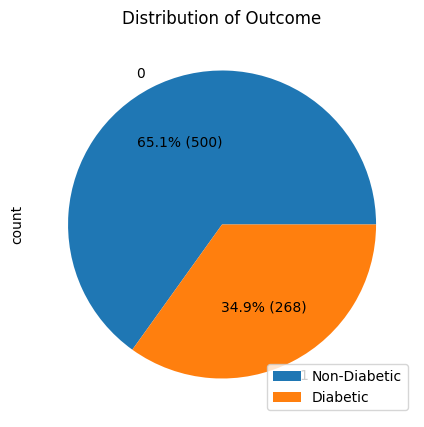

In [5]:
class_counts = df['Outcome'].value_counts()

plt.figure(figsize=(5, 5))
ax = df['Outcome'].value_counts().plot(kind='pie', autopct=lambda p: f'{p:.1f}% ({int(p * sum(class_counts) / 100)})')
plt.title('Distribution of Outcome')
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.show()

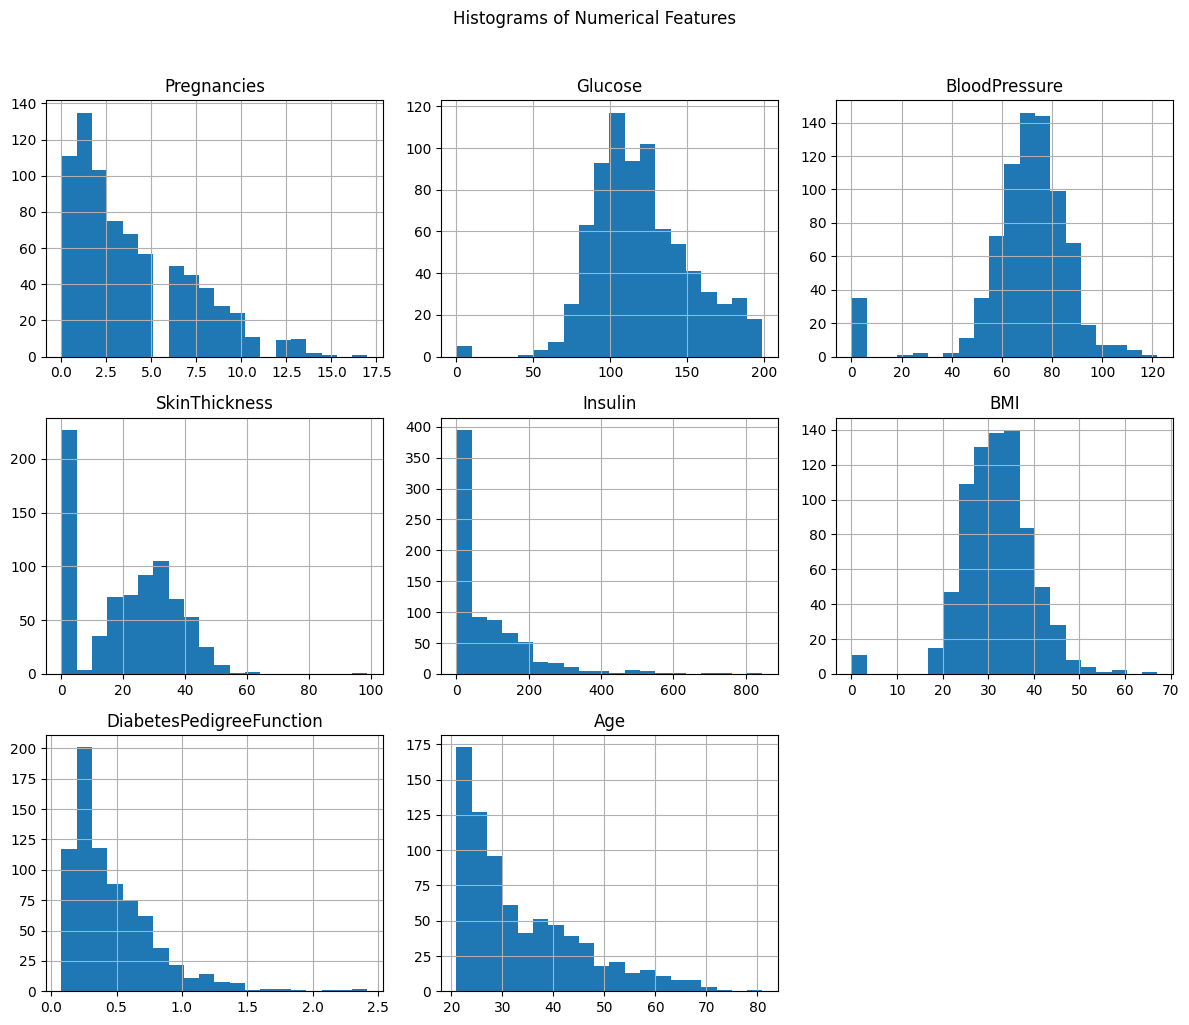

In [6]:
df.drop("Outcome", axis=1).hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

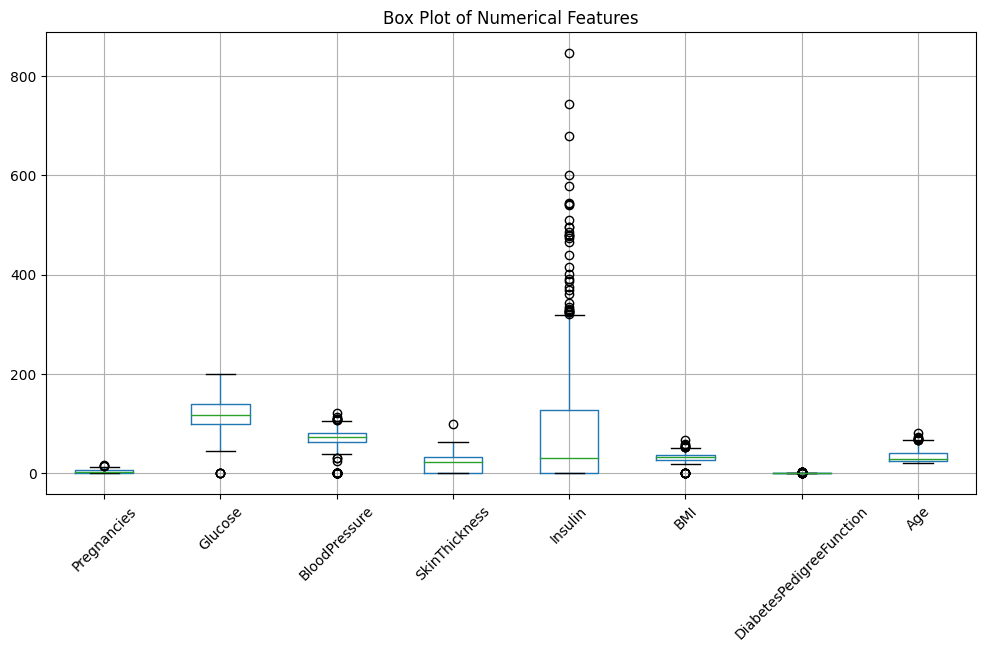

In [7]:
plt.figure(figsize=(12, 6))
df.drop("Outcome", axis=1).boxplot()
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

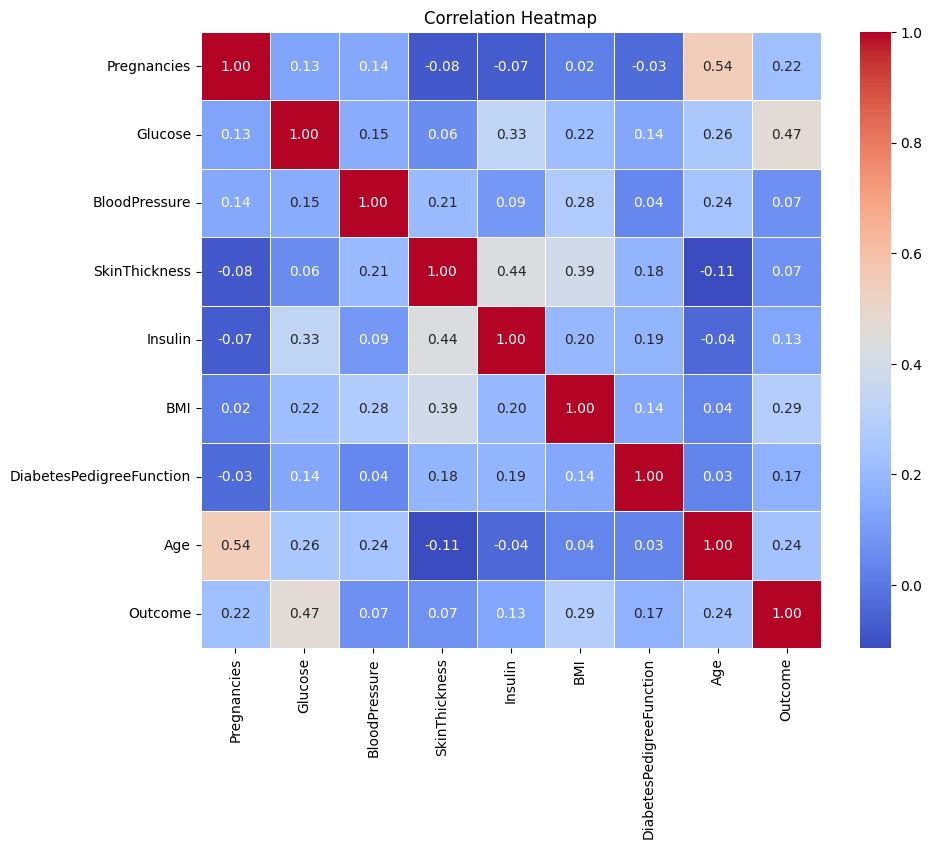

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

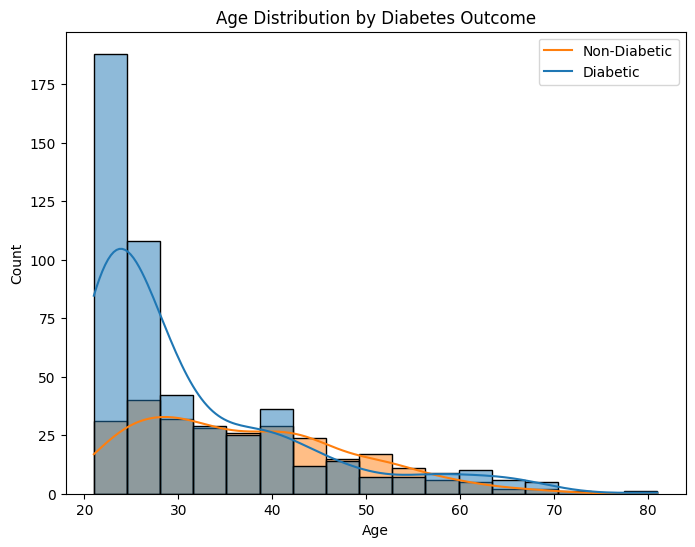

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Outcome', kde=True)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(labels=['Non-Diabetic', 'Diabetic'])
plt.show()

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


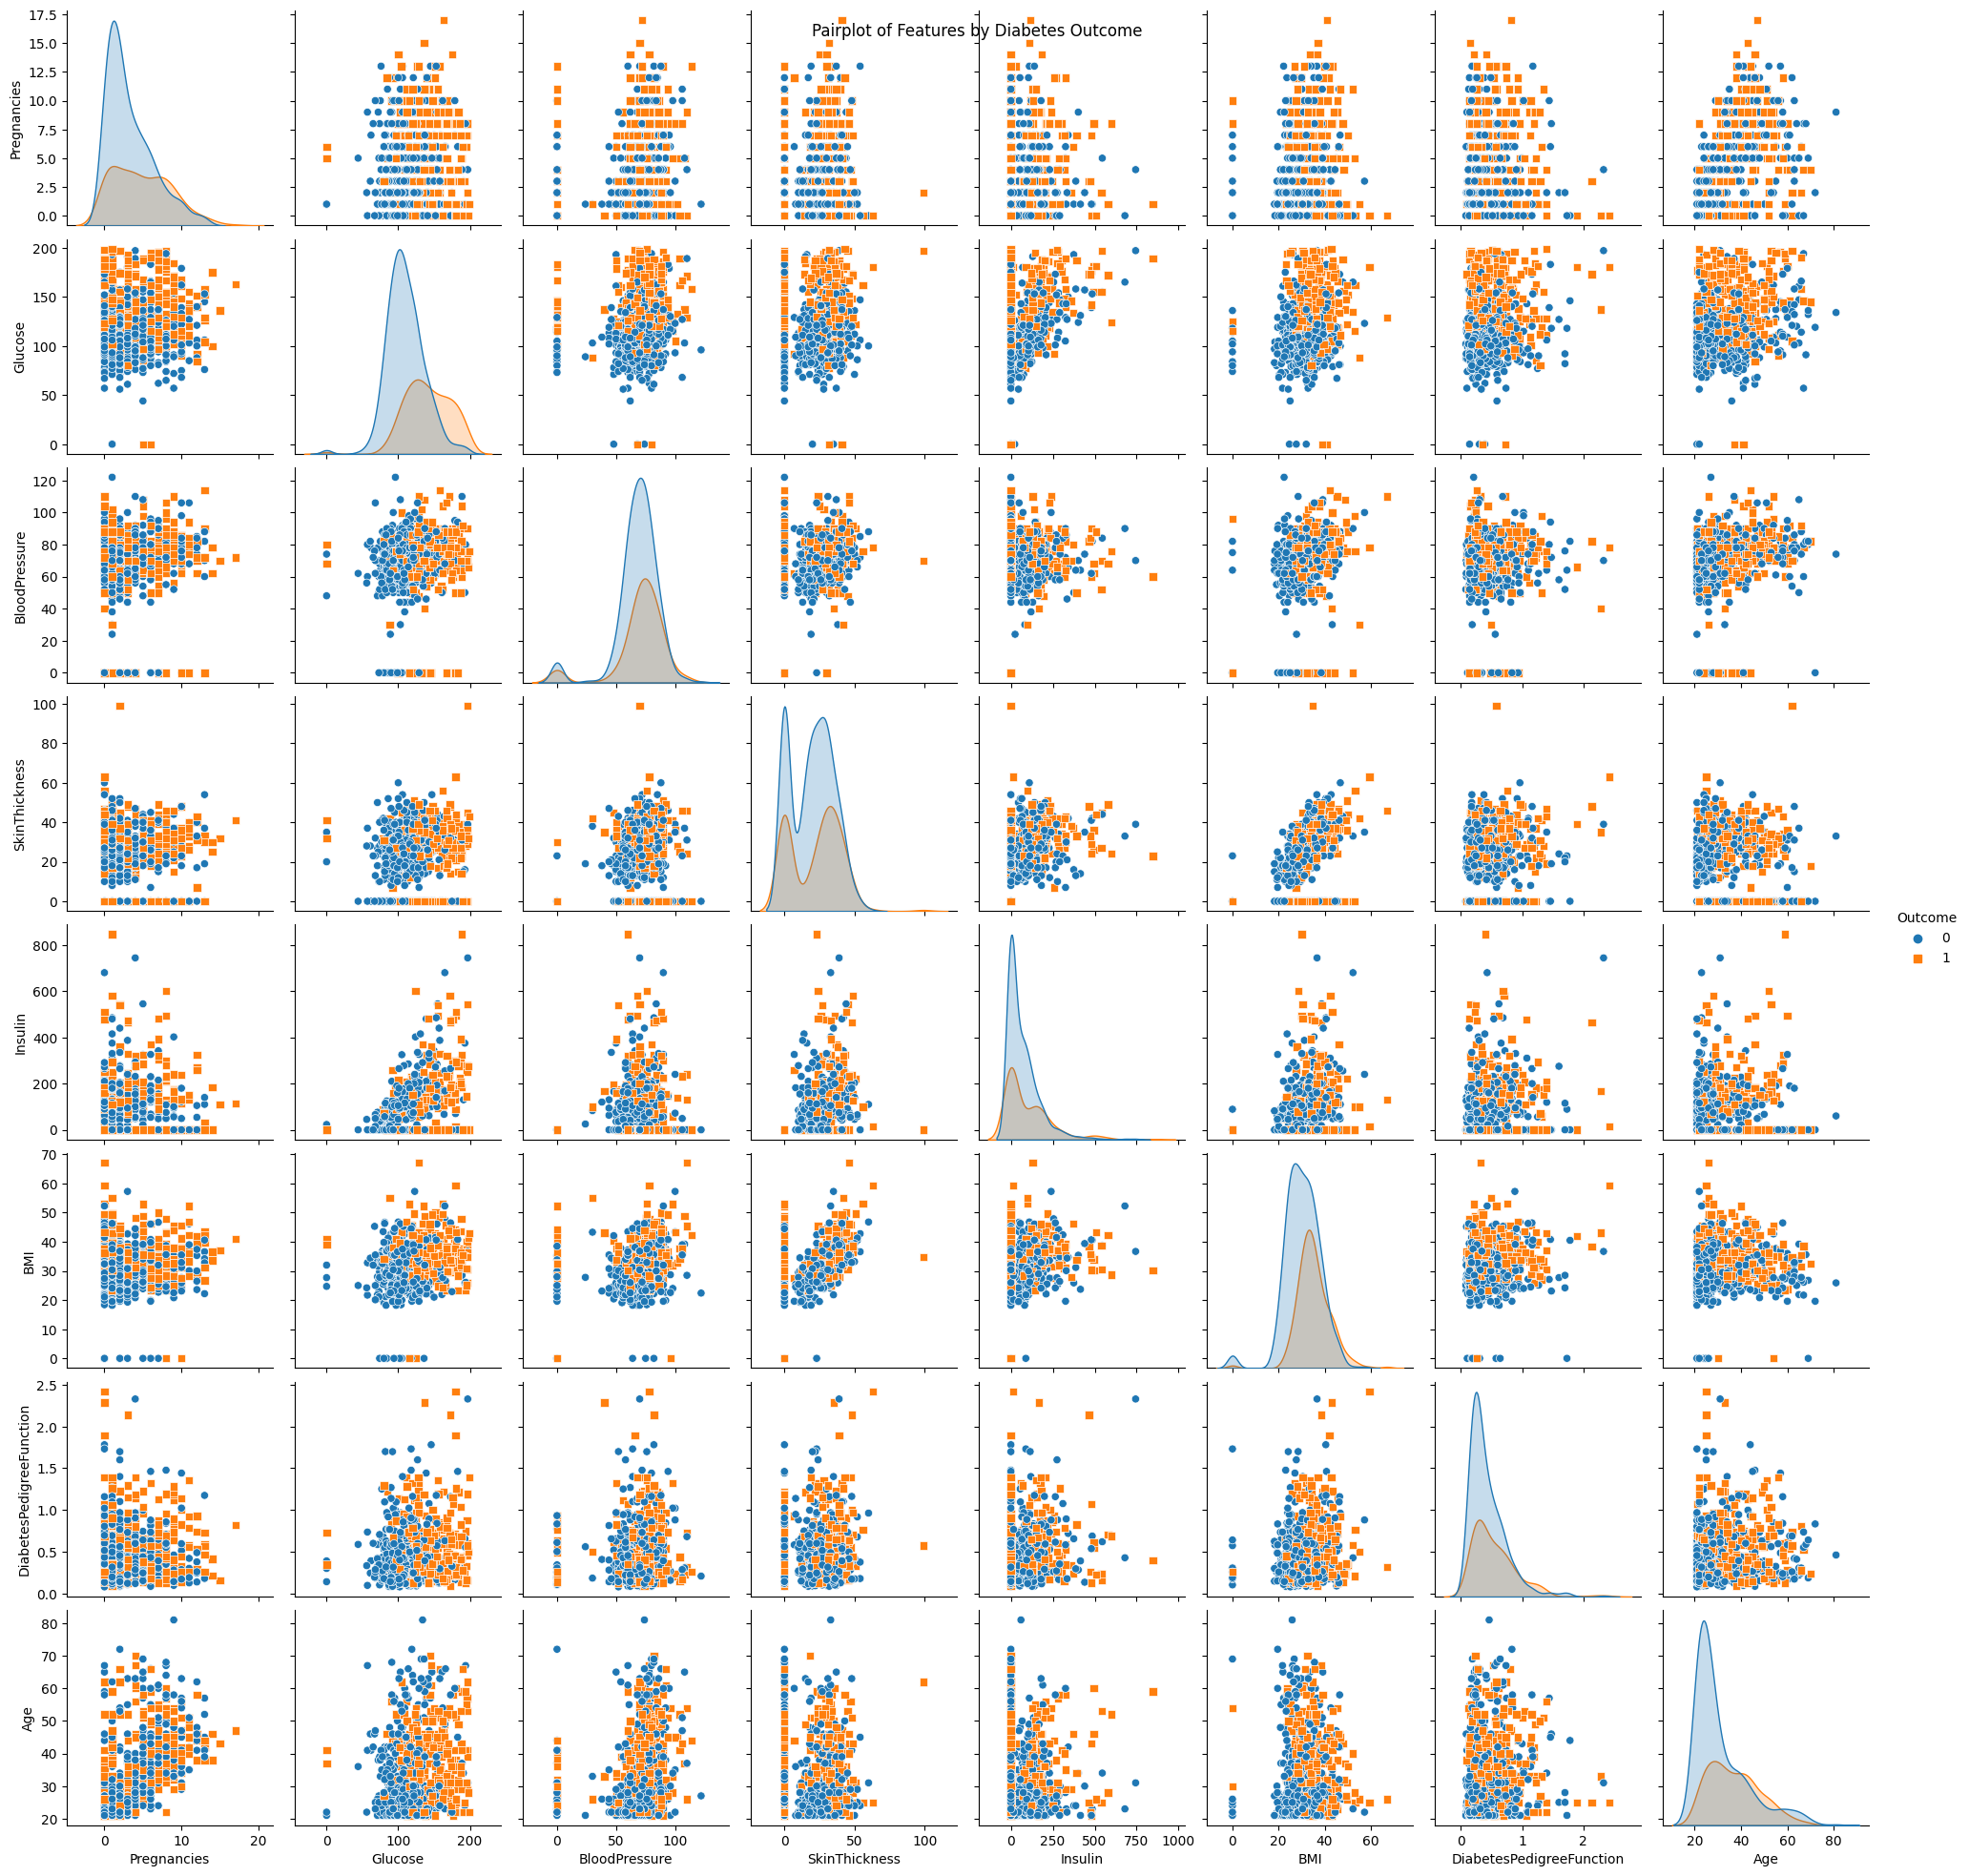

In [10]:
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pairplot of Features by Diabetes Outcome")
plt.show()

---

In [11]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [16]:
print("Model:", model)
print(f"\nAccuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Model: RandomForestClassifier(random_state=42)

Accuracy: 75.97%

Confusion Matrix:
 [[85 15]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

ROC AUC Score: 0.7212962962962962


In [17]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 24.9 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

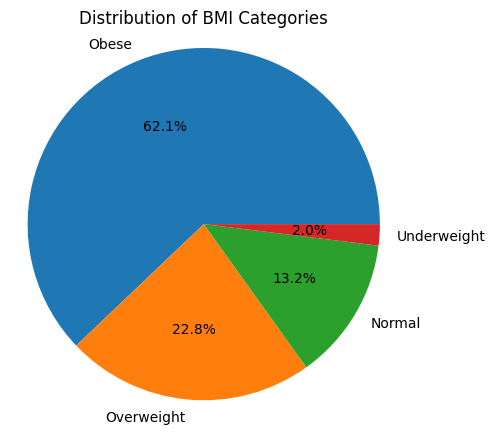

In [18]:
bmi_category_counts = df['BMI_Category'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%')
plt.title("Distribution of BMI Categories")
plt.axis('equal')
plt.show()

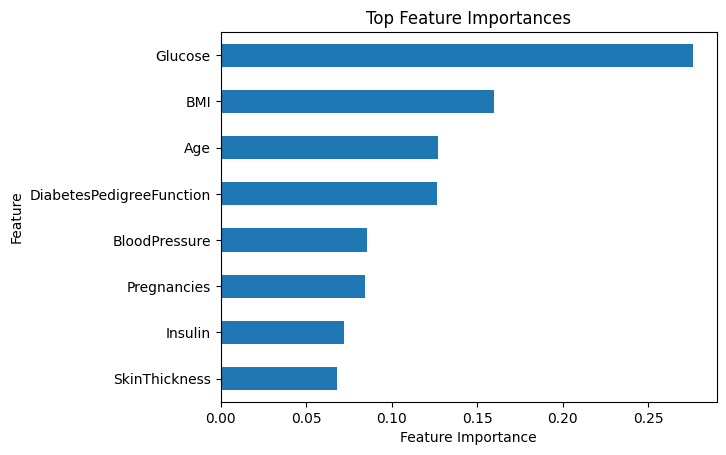

In [19]:
top_feature = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)

top_feature.plot(kind='barh')
plt.title("Top Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

In [20]:
print("Conclusions")
print(f"|-> Feature importance analysis reveals that [{top_feature.index[0]}] are the most influential in predicting diabetes.")
print(f"|-> The model achieved an accuracy of [{accuracy*100:.2f}%], indicating its potential for diabetes prediction.")

Conclusions
|-> Feature importance analysis reveals that [Glucose] are the most influential in predicting diabetes.
|-> The model achieved an accuracy of [75.97%], indicating its potential for diabetes prediction.
